# Setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import warnings
import matplotlib.pyplot as plt # data visualization

warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# Loading The Dataset
df_asteroids = pd.read_csv('../Data/dataset.csv', low_memory=False)
df_asteroids.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


# **Data Exploration**

Column Descriptions provided with the dataset:

> * SPK-ID: Object primary SPK-ID
> * Object ID: Object internal database ID
> * Object fullname: Object full name/designation
> * pdes: Object primary designation
> * name: Object IAU name
> * NEO: Near-Earth Object (NEO) flag
> * PHA: Potentially Hazardous Asteroid (PHA) flag
> * H: Absolute magnitude parameter
> * Diameter: object diameter (from equivalent sphere) km Unit
> * Albedo: Geometric albedo
> * Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
> * Orbit_id: Orbit solution ID
> * Epoch: Epoch of osculation in modified Julian day form
> * Equinox: Equinox of reference frame
> * e: Eccentricity
> * a: Semi-major axis au Unit
> * q: perihelion distance au Unit
> * i: inclination; angle with respect to x-y ecliptic plane
> * tp: Time of perihelion passage TDB Unit
> * moid_ld: Earth Minimum Orbit Intersection Distance au Unit

In [3]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [4]:
df_asteroids.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [5]:
df_asteroids.shape

(958524, 45)

In [6]:
df_asteroids.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [7]:
df_asteroids['prefix'].unique()

array([nan, 'A'], dtype=object)

In [8]:
df_asteroids_without_ids = df_asteroids.drop(['id','spkid','full_name','pdes','name','prefix','equinox'],axis=1)

In [9]:
df_asteroids_without_ids.head()

,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [10]:
df_asteroids_without_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             958520 non-null  object 
 1   pha             938603 non-null  object 
 2   H               952261 non-null  float64
 3   diameter        136209 non-null  float64
 4   albedo          135103 non-null  float64
 5   diameter_sigma  136081 non-null  float64
 6   orbit_id        958524 non-null  object 
 7   epoch           958524 non-null  float64
 8   epoch_mjd       958524 non-null  int64  
 9   epoch_cal       958524 non-null  float64
 10  e               958524 non-null  float64
 11  a               958524 non-null  float64
 12  q               958524 non-null  float64
 13  i               958524 non-null  float64
 14  om              958524 non-null  float64
 15  w               958524 non-null  float64
 16  ma              958523 non-null  float64
 17  ad        

In [11]:
df_asteroids_dropna = df_asteroids_without_ids.dropna()

In [12]:
df_asteroids_dropna.isna().sum()

neo               0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
orbit_id          0
epoch             0
epoch_mjd         0
epoch_cal         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64

In [13]:
df_asteroids_dropna.loc[:, ['neo','pha','H','class']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131142 entries, 0 to 909489
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   neo     131142 non-null  object 
 1   pha     131142 non-null  object 
 2   H       131142 non-null  float64
 3   class   131142 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.0+ MB


In [14]:
#The cols 'neo' and 'pha' are boolean but use Y/N characters.
#Lets change those to binary integers 1/0
df_asteroids_bool = df_asteroids_dropna

#replace Y with 1:True and N with 0:False in the 'neo' col
df_asteroids_bool.loc[:,'neo'] = df_asteroids_dropna.loc[:,'neo'].replace({'Y': 1,'N': 0})

#replace Y with 1:True and N with 0:False in the 'pha' col
df_asteroids_bool.loc[:,'pha'] = df_asteroids_dropna.loc[:,'pha'].replace({'Y': 1,'N': 0})

#verify
df_asteroids_bool.loc[:,['neo','pha']].value_counts()

C:\Users\addym\AppData\Local\Temp\ipykernel_20208\2441254243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asteroids_bool.loc[:,'neo'] = df_asteroids_dropna.loc[:,'neo'].replace({'Y': 1,'N': 0})
C:\Users\addym\AppData\Local\Temp\ipykernel_20208\2441254243.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_asteroids_bool.loc[:,'neo'] = df_asteroids_dropna.loc[:,'neo'].replace({'Y': 1,'N': 0})
C:\Users\addym\AppData\Local\Temp\ipykernel_20208\2441254243.py:9: SettingWithCopyWarning: 
A value is trying to be set o

neo  pha
0    0      130403
1    0         558
     1         181
dtype: int64

In [15]:
df_asteroids_encode = df_asteroids_bool

#Assign each asteroid class a number and replace
df_asteroids_encode.loc[:,'class'] = df_asteroids_bool.loc[:,'class'].replace({"AMO":int(1), "APO":int(2), "AST":int(3), "ATE":int(4), 
                                                       "CEN":int(5), "HYA":int(6), "IEO":int(7), "IMB":int(8),
                                                       "MBA":int(9), "MCA":int(10), "OMB":int(11), "TJN":int(12),
                                                       "TNO":int(13)}).astype('int64')

#Lets drop the orbit ids for now because they are not categoriacal
df_asteroid = df_asteroids_encode.drop(['orbit_id'],axis=1)

#verify
df_asteroids_encode.loc[:,'class'].value_counts()

C:\Users\addym\AppData\Local\Temp\ipykernel_20208\2550531189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asteroids_encode.loc[:,'class'] = df_asteroids_bool.loc[:,'class'].replace({"AMO":int(1), "APO":int(2), "AST":int(3), "ATE":int(4),
C:\Users\addym\AppData\Local\Temp\ipykernel_20208\2550531189.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_asteroids_encode.loc[:,'class'] = df_asteroids_bool.loc[:,'class'].replace({"AMO":int(1), "APO":int(2), "AST":int(3), "ATE":int(4),


9     120392
11      7298
12      1872
8        451
2        429
10       324
1        223
4         87
5         48
13        12
3          6
Name: class, dtype: int64

## Secondary Exploration
Here we can visualize the data better now that it has had a first round of cleaning

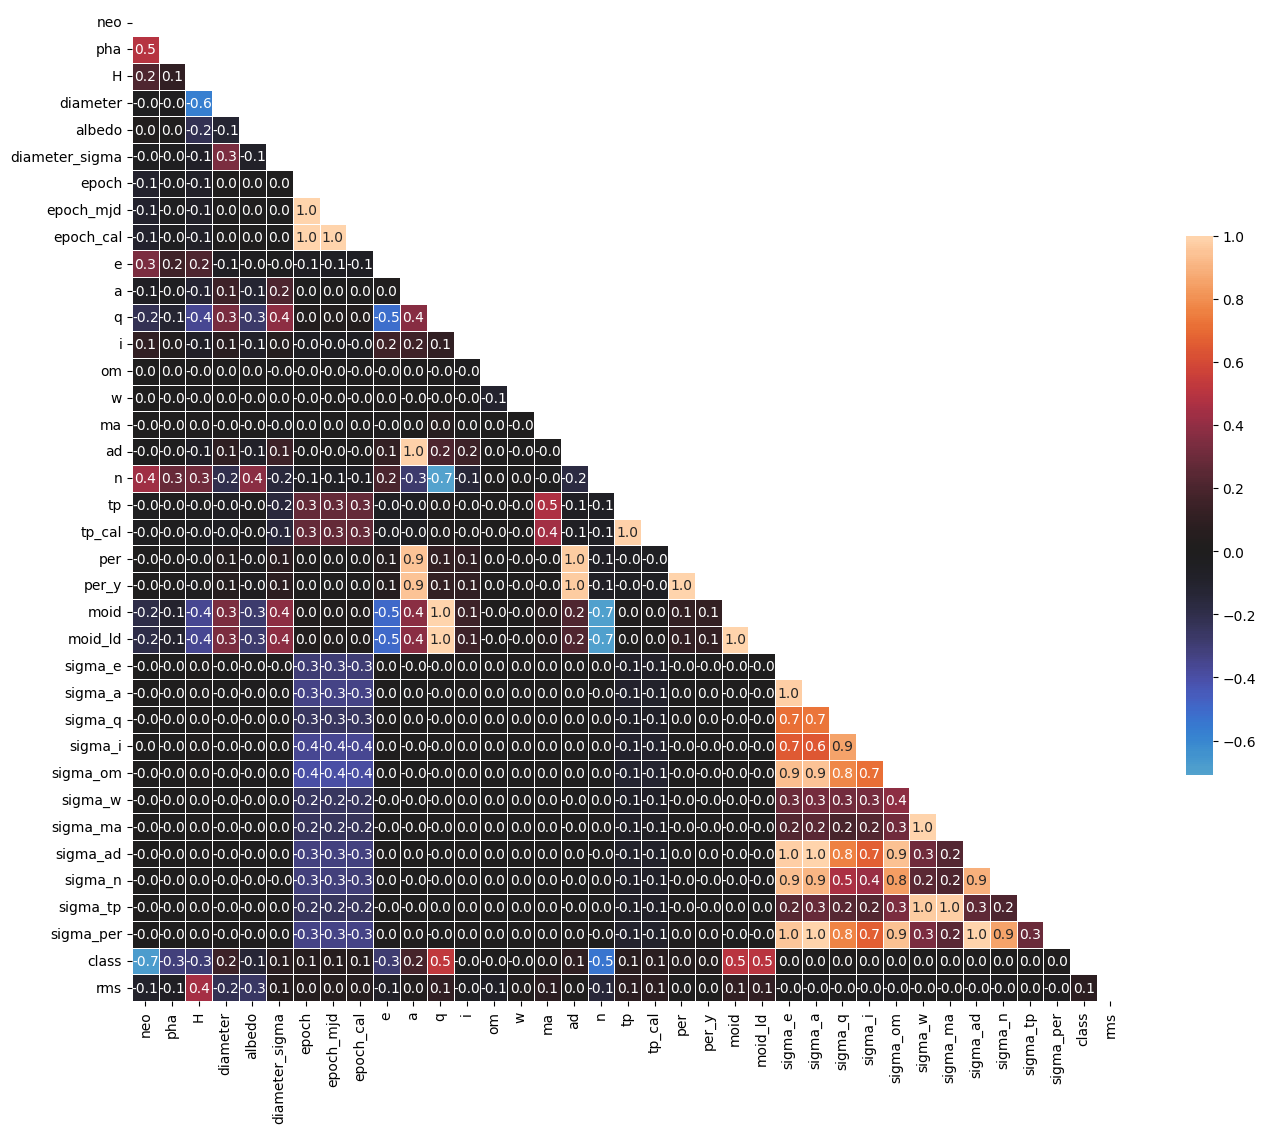

In [16]:
a_corr = df_asteroid.corr()   #calculate the correlations between cols
mask = np.triu(np.ones_like(a_corr, dtype=bool))     #create mask to hide repeated mirrored info
f, ax = plt.subplots(figsize=(16, 14))         #define the size of the heatmap

#draw the heatmap
a_heatmap=sns.heatmap(a_corr, mask=mask, vmax=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".1f")


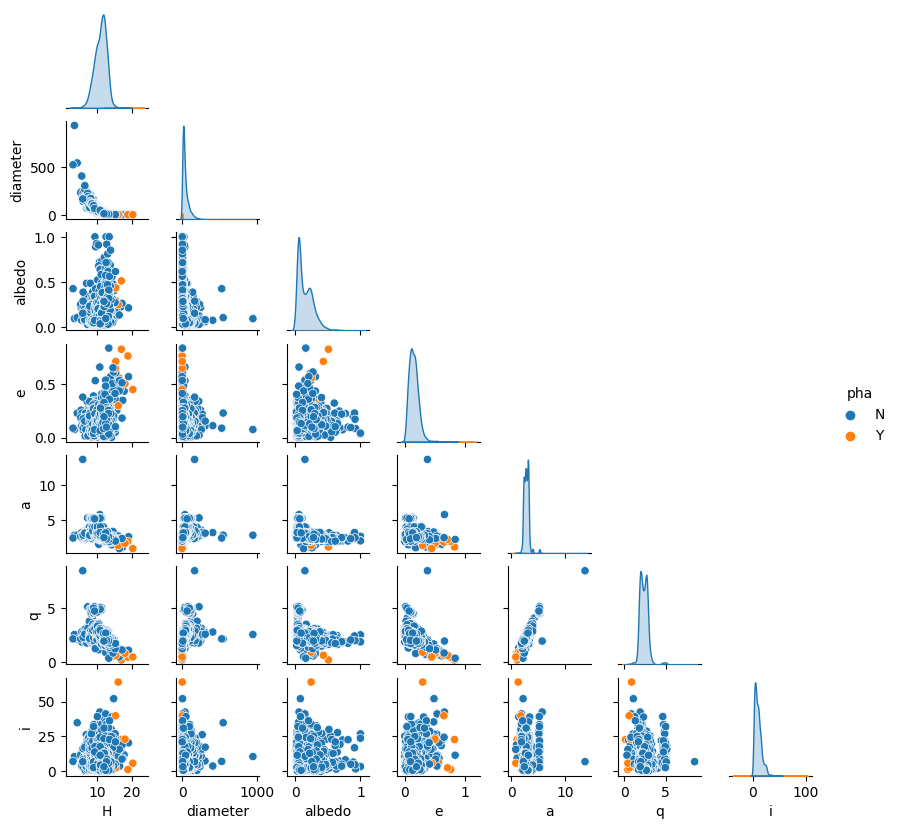

In [17]:
df_asteroid = df_asteroid.astype('float')
df_asteroid['pha'] = df_asteroid['pha'].astype('category')

#draw pair plots using the first 2500 datapoints, where orange are asteroids that are hazardous
pp_asteroids = sns.pairplot(corner=True, 
                            data=df_asteroids.loc[0:2500, ['pha','H','diameter','albedo','e','a','q','i']],
                            hue=('pha'),
                            height=1.2)
#The data looks pretty good, but some of the graphs in the pair plot
#look like they need to be normalized

## Normalize the data

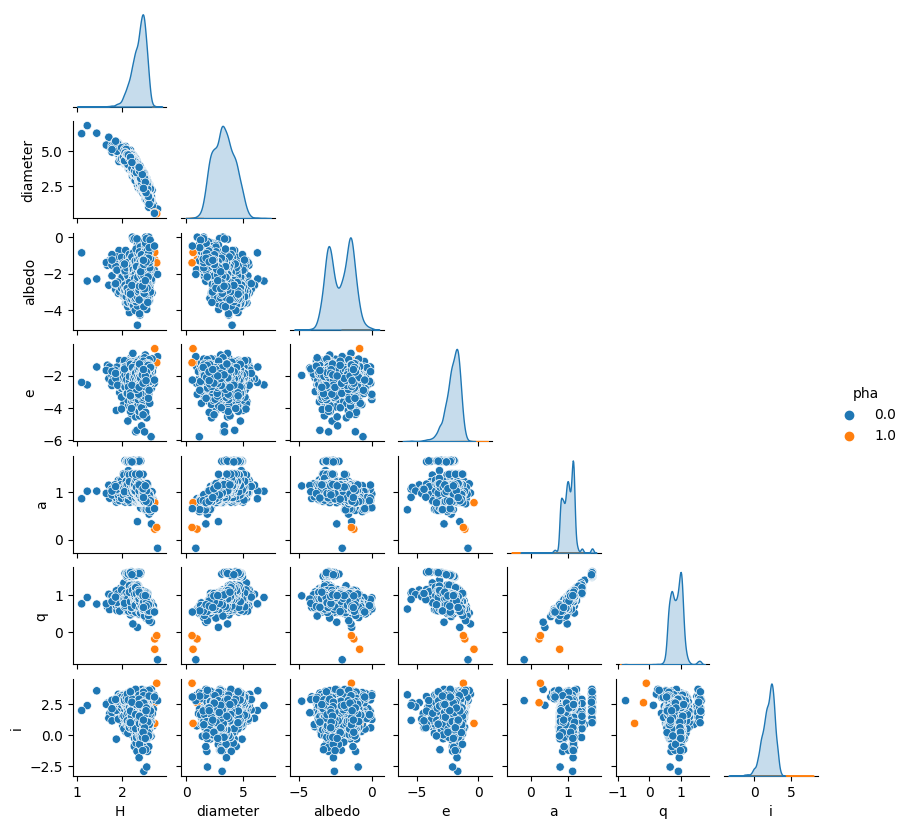

In [18]:
df_asteroid_normalized = np.log(df_asteroid.drop(['neo','class','pha'],axis=1)) #normalize them
df_asteroid_normalized.loc[:,['neo','class','pha']] = df_asteroid.loc[:,['neo','class','pha']]

#to make sure the other dataset has the columns in the same order, we will drop and add the columns here too
df_asteroid = df_asteroid.drop(['neo','class','pha'],axis=1)
df_asteroid.loc[:,['neo','class','pha']] = df_asteroid_normalized.loc[:,['neo','class','pha']]

#draw the normalized pair plot
pp_asteroids = sns.pairplot(corner=True, 
                            data=df_asteroid_normalized.loc[0:2500, ['pha','H','diameter','albedo','e','a','q','i']],
                            hue=('pha'),
                            height=1.2)

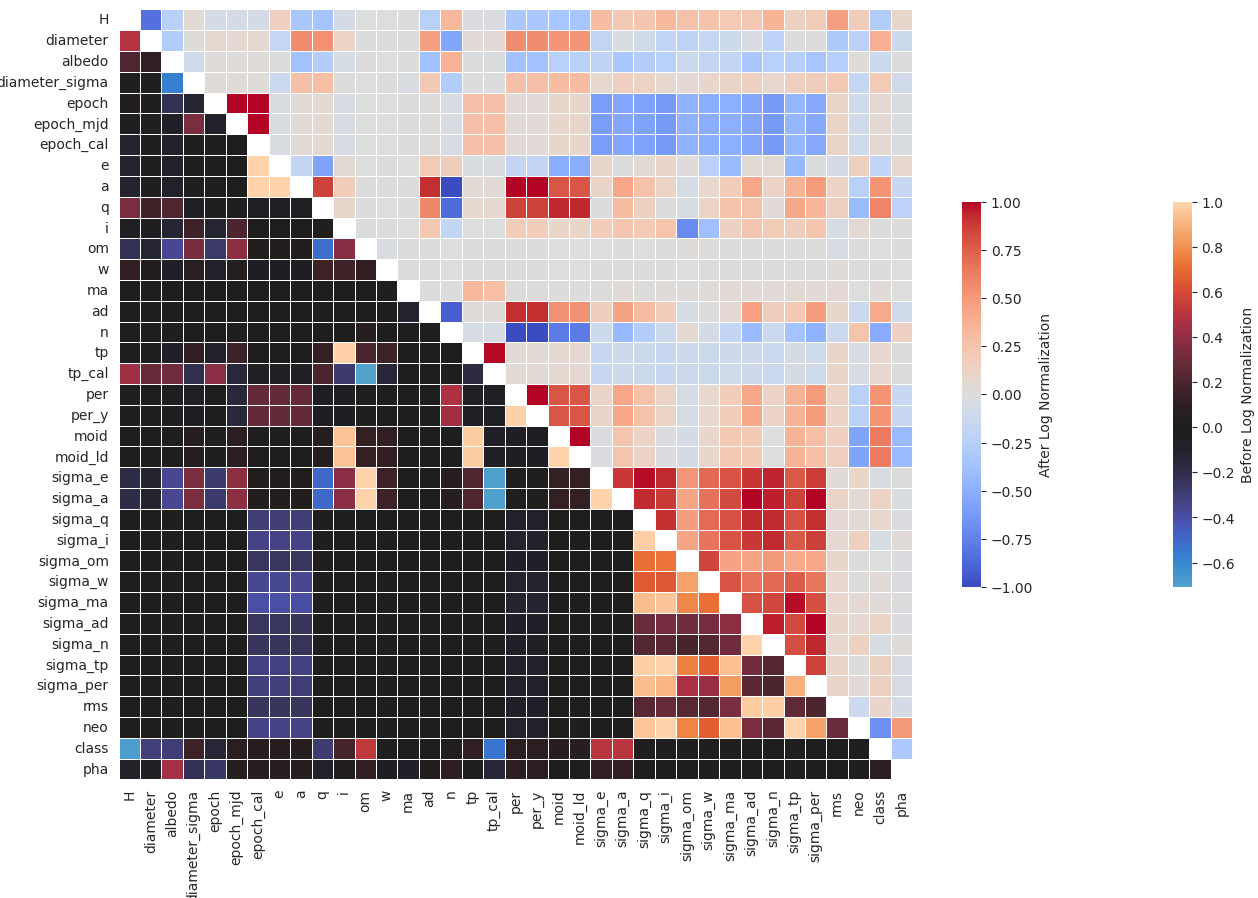

In [19]:
df_asteroid_normalized['pha'] = df_asteroid_normalized['pha'].astype('int64')

an_corr = df_asteroid_normalized.corr()   #calculate the correlations between logged data

#define the size of the graph
f = plt.figure(figsize = (16,10))

#define the mask for the regular heat map
mask = np.zeros_like(a_corr)
mask[np.triu_indices_from(mask)] = True

# Display the correlation heatmap for the non normalized
with sns.axes_style("white"):
    ax1 = sns.heatmap(a_corr, mask=mask, cbar_kws={'label': 'Before Log Normalization',"shrink": .5},vmax=1.0, center=0, linewidths=.5,fmt=".1f")
    
#define the 2nd mask for the same graph 
mask2 = np.zeros_like(a_corr)
mask2[np.tril_indices_from(mask2)] = True
# Display the correlation heatmap for the normalized
with sns.axes_style("white"):
    ax2 = sns.heatmap(an_corr, mask=mask2,cmap="coolwarm", cbar_kws={'label': 'After Log Normalization',"shrink": .5},vmax=1.0, center=0, linewidths=.5,fmt=".1f")

## **Data Exploration Summary**

In [20]:
df_asteroid = df_asteroid.astype('float')
df_asteroid 

df_asteroid_normalized = df_asteroid_normalized.astype(float)
df_asteroid_normalized.head()

,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,...,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,neo,class,pha
0,1.223775,6.845241,-2.407946,-1.609438,14.715103,10.978490,16.820719,-2.576903,1.018546,0.939493,...,-16.529861,-18.666492,-25.222906,-27.451620,-17.090190,-18.480866,-0.836994,0.0,9.0,0.0
1,1.435085,6.300786,-2.292635,2.890372,14.715266,10.985293,16.821219,-1.469797,1.020233,0.758904,...,-11.604142,-11.634065,-19.121598,-21.488210,-10.107147,-12.512408,-1.023431,0.0,9.0,0.0
2,1.673351,5.507751,-1.541779,2.360288,14.715266,10.985293,16.821219,-1.358927,0.981436,0.684462,...,-10.940760,-11.722363,-19.249900,-21.541206,-10.251968,-12.681789,-1.083290,0.0,9.0,0.0
3,1.098612,6.264160,-0.860856,-1.609438,14.715103,10.978490,16.820719,-2.422253,0.859262,0.766356,...,-15.536271,-13.627538,-20.223339,-22.065543,-12.403622,-13.572643,-0.916791,0.0,9.0,0.0
4,1.931521,4.670012,-1.294627,1.144223,14.715266,10.985293,16.821219,-1.655936,0.945476,0.733626,...,-10.419594,-11.698797,-19.169552,-21.316984,-10.267532,-12.565466,-0.650260,0.0,9.0,0.0


# **Data Separation**

In [23]:
# Generating Random Dataset with proper fraction of hazardous and non hazardous samples

def generate_random_dataset(fraction=0.05, fraction2=0.5, dataset=df_asteroid_normalized):
    asteroid_sort = dataset.sort_values('pha', ascending=False)
    hazard = asteroid_sort[:181]
    non_hazard = asteroid_sort[182:]
    test_set = pd.concat([hazard.sample(frac=fraction2),non_hazard.sample(frac=fraction)])
    test_set = test_set.sample(frac=1)
    feat = test_set.columns
    feat = feat.drop('pha')
    x_rand = test_set.loc[:,feat]
    y_rand = test_set['pha']
    return x_rand, y_rand

In [25]:
from sklearn.model_selection import train_test_split

#Generating Random dataset with proper fraction
X,Y = generate_random_dataset(fraction=.05, fraction2=1, dataset=df_asteroid_normalized)

#Splitting into training and testing dataset with a test _size of 30%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [31]:
print(X.shape," ",Y.shape)
#This gives better data with ratio of equal likely pha asteroids

(6729, 36)   (6729,)


### Applying Basic Machine Learning Algorithms

In [36]:
# Here We will add accuracy of each of the model in a dictionary to compare for all models later
accuracy_dic = {}
def add_accuracy(Atrain,Atest,algo):
    accuracy_dic[algo] = {"Train":Atrain,"Test":Atest}
    print("Successfully added Accuracy of {} in the Accuracy Dictionary\n".format(algo))

In [40]:
# Importing basic performance metrics stuffs
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## **Model 1**
### K-Nearest Neighbor

In [39]:
from sklearn.neighbors import KNeighborsClassifier

asteroid_knn=KNeighborsClassifier(n_neighbors=5) #Taking k-nearest neighbour value = 5
asteroid_knn.fit(x_train,y_train)

# Making Predictions on Training and Testing Dataset
y_train_pred = asteroid_knn.predict(x_train)
y_test_pred = asteroid_knn.predict(x_test)

#Calculating Training and Testing Accuracy
knn_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
knn_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {knn_train_accuracy} ==> ({(knn_train_accuracy*100):.2f}%)")
print(f"Testing Accuracy: {knn_test_accuracy} ==> ({(knn_test_accuracy*100):.2f}%)")
print()

#Storing Calculated Training and Testing Accuracy in a Dictionary
add_accuracy(knn_train_accuracy,knn_test_accuracy,"knn")

print(classification_report(y_test,y_test_pred))

Training Accuracy: 0.99723991507431 ==> (99.72%)
Testing Accuracy: 0.9965329370975731 ==> (99.65%)

Successfully added Accuracy of knn in the Accuracy Dictionary

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1965
         1.0       0.89      1.00      0.94        54

    accuracy                           1.00      2019
   macro avg       0.94      1.00      0.97      2019
weighted avg       1.00      1.00      1.00      2019



Confusion Matrix:
[[1958    7]
 [   0   54]]


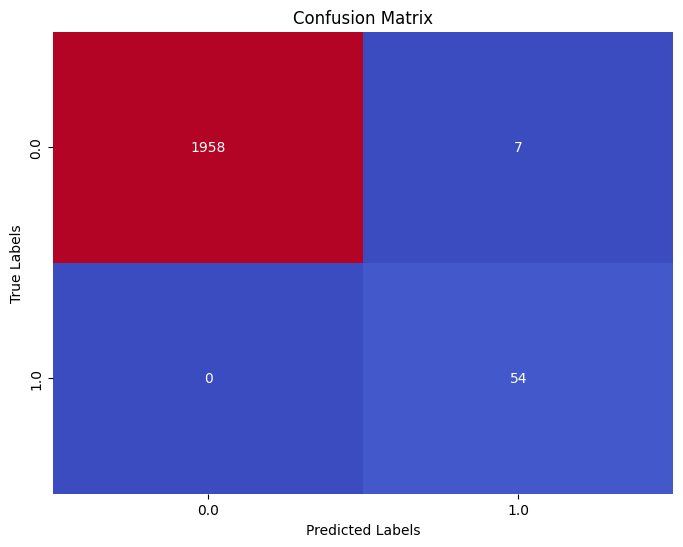

In [47]:
# Getting Confusion Matrix for the Predictions made
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d",cmap="coolwarm", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## **Model 2**
### Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

# Making Predictions on Training and Testing Dataset
y_train_pred = nb_model.predict(x_train)
y_test_pred = nb_model.predict(x_test)

#Calculating Training and Testing Accuracy
nb_train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
nb_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {nb_train_accuracy} ==> ({(nb_train_accuracy*100):.2f}%)")
print(f"Testing Accuracy: {nb_test_accuracy} ==> ({(nb_test_accuracy*100):.2f}%)")
print()

#Storing Calculated Training and Testing Accuracy in a Dictionary
add_accuracy(nb_train_accuracy,nb_test_accuracy,"NaiveBayes")

print(classification_report(y_test,y_test_pred))

Training Accuracy: 0.9959660297239915 ==> (99.60%)
Testing Accuracy: 0.995047052996533 ==> (99.50%)

Successfully added Accuracy of NaiveBayes in the Accuracy Dictionary

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1965
         1.0       0.84      1.00      0.92        54

    accuracy                           1.00      2019
   macro avg       0.92      1.00      0.96      2019
weighted avg       1.00      1.00      1.00      2019



Confusion Matrix:
[[1955   10]
 [   0   54]]


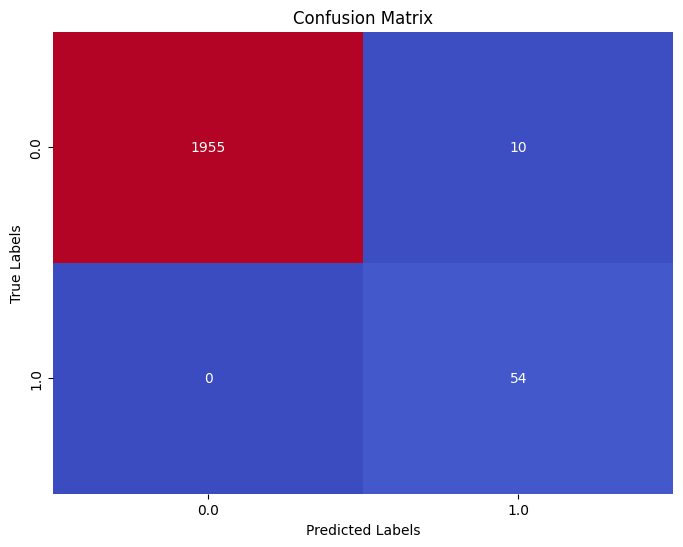

In [50]:
# Getting Confusion Matrix for the Predictions made
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d",cmap="coolwarm", cbar=False,
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()